### Img Histograms ###

In [1]:
# ref: https://www.pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

#### Histogram Equalization

105.41525793621602
128.46912072660575


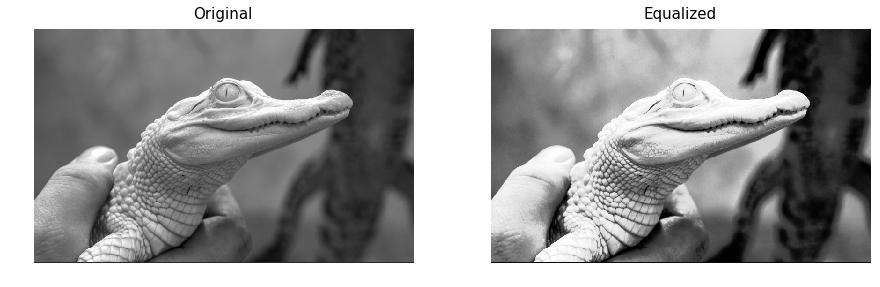

In [52]:
img = cv2.imread('img1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_equalized = cv2.equalizeHist(img_gray, img_gray.copy())

img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
img_equalized = cv2.cvtColor(img_equalized, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_imgs_plt([[img_gray , img_equalized]], [['Original', 'Equalized']], fig_size = (15,15))

print(np.mean(img_gray))
print(np.mean(img_equalized))

#### Image Histograms

In [53]:
def gray_histogram(img, normalize=True):
    
    # Gray-scale histogram:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    
    plt.subplot()
    plt.title('Gray-Scale Histogram');
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    plt.xlim([0, 256])

    if normalize:
        # Normalizing:
        hist /= hist.sum()
        plt.ylabel('% of Pixels')
        
    plt.plot(hist)
   
    return hist

In [54]:
def color_histogram(img, normalize=True):
    # expecting BGR img
    # Split Channels:
    chans = cv2.split(img)
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title('Flatten Color Histogram');
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    plt.xlim([0, 256])

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        
        # Normalizing:
        if normalize:
            hist /= hist.sum()
            plt.ylabel('% of Pixels')
            
        plt.plot(hist, color=color)
        
    return hist

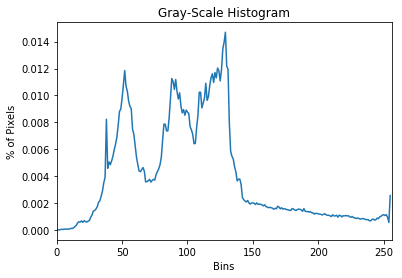

In [59]:
hist = gray_histogram(img)

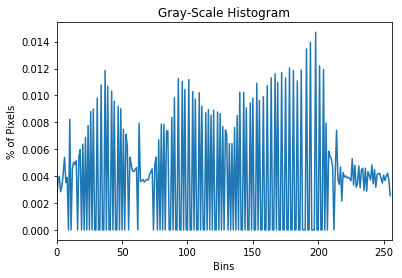

In [60]:
hist = gray_histogram(img_equalized)

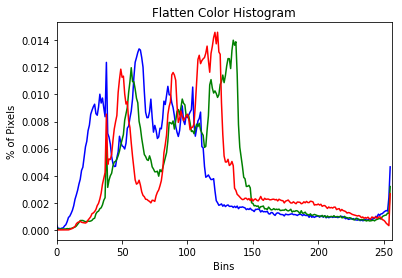

In [49]:
hist = color_histogram(img)

2D histogram shape: (32, 32), with 1024 values


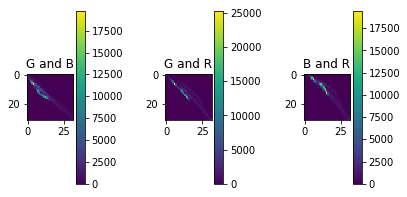

In [9]:
fig = plt.figure()
ax = fig.add_subplot(151)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(153)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(155)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))